In [1]:
# Sample API
import flowx
print(flowx.__environment__, flowx.__version__)

serial 0.1.dev


In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = -0.5, 0.5
ymin, ymax = -0.5, 0.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'ibmx', 'ibmy', 'delp']
face_vars     = ['velc', 'hvar']
ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']
imbound_vars  = ['ibmf', 'velc', 'ibmx', 'ibmy']

scalar_info   = dict(tmax = 20, dt = 0.001, Re = 100.0, Re_s = 10.0, mu_s = 1.0)

simulation_info = dict(with_ib = True, ib_type = 'visco', extrap_solid = 10)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5')]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'],
                      ibmf = ['projection', 'projection', 'projection', 'projection'],
                      ibmx = ['projection', 'projection', 'projection', 'projection'],
                      ibmy = ['projection', 'projection', 'projection', 'projection'])

bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, poisson_info=simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, ins_info=simulation_info)

In [3]:
imbound.map_to_grid()

Level Set Advection Time:  4.922656059265137
------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4679884347926976e-11
Total poisson time : 0.0005917549133300781
Total INS time : 2.003153085708618
Max, Min, U   : 2.0, -0.009552906204103973
Max, Min, V   : 0.02396714772440395, -0.02396714772440395
Max, Min, P   : 2.712042525644456, -2.7520705068280202
Max, Min, DIV : 2.8449465006019636e-15, -3.0010716134398763e-15
Qin, Qout     : 0.0, 0.0




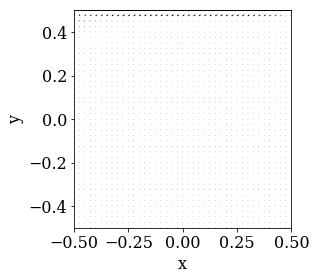

Level Set Advection Time:  0.006906270980834961
------------ Time = 0.001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.829395085768609e-12
Total poisson time : 0.0004432201385498047
Total INS time : 0.007651090621948242
Max, Min, U   : 2.0, -0.014553364608420171
Max, Min, V   : 0.03765620283884879, -0.03765620283884879
Max, Min, P   : 1.7335137401149892, -1.7584833144744507
Max, Min, DIV : 1.2212453270876722e-15, -8.881784197001252e-16
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005359172821044922
------------ Time = 0.002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0849263035839458e-13
Total poisson time : 0.0004451274871826172
Total INS time : 0.007478237152099609
Max, Min, U   : 2.0, -0.019239892835103647
Max, Min, V   : 0.050827777922502426, -0.050827777922502426
Max, Min, P   : 1.7117059512255821, -1.7406951280072087
Max, Min, DIV : 4.440892098500626e-16, -4.163336342344337e-16
Qin, Qout     : 0

Level Set Advection Time:  0.011548042297363281
------------ Time = 0.026000000000000016 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.808448097011739e-14
Total poisson time : 0.0004551410675048828
Total INS time : 0.01073312759399414
Max, Min, U   : 2.0, -0.07767446072288683
Max, Min, V   : 0.2179252825007384, -0.2179252825007384
Max, Min, P   : 1.3453822829621787, -1.2531527437066337
Max, Min, DIV : 1.7763568394002505e-15, -1.5681900222830336e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.009042978286743164
------------ Time = 0.027000000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1004074865457154e-13
Total poisson time : 0.001134634017944336
Total INS time : 0.008592844009399414
Max, Min, U   : 2.0, -0.07935376657344852
Max, Min, V   : 0.2213442420731034, -0.2213442420731034
Max, Min, P   : 1.3362796515555073, -1.2423192797170335
Max, Min, DIV : 1.8093165854438098e-15, -1.443289932012703

Level Set Advection Time:  0.008291959762573242
------------ Time = 0.05000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.482583584755076e-13
Total poisson time : 0.0004291534423828125
Total INS time : 0.015340805053710938
Max, Min, U   : 2.0, -0.1018732404006436
Max, Min, V   : 0.26990543695620783, -0.26990543695620783
Max, Min, P   : 1.1688923335614576, -1.11192822793482
Max, Min, DIV : 3.191891195797325e-15, -3.191891195797325e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.011327981948852539
------------ Time = 0.05100000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.89369142231471e-13
Total poisson time : 0.0007348060607910156
Total INS time : 0.014849185943603516
Max, Min, U   : 2.0, -0.10229661365087939
Max, Min, V   : 0.2711650814352951, -0.2711650814352951
Max, Min, P   : 1.1711201798445228, -1.1015694422126707
Max, Min, DIV : 3.165870343657673e-15, -3.164135620181696e-15
Q

Level Set Advection Time:  0.012449979782104492
------------ Time = 0.07000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8934856622951974e-13
Total poisson time : 0.00041985511779785156
Total INS time : 0.012526988983154297
Max, Min, U   : 2.0, -0.1165816226110915
Max, Min, V   : 0.2883460541465713, -0.2883460541465713
Max, Min, P   : 1.0950945988569094, -1.0639448959323912
Max, Min, DIV : 2.8275992658421956e-15, -2.949029909160572e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.01868438720703125
------------ Time = 0.07100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3402804883850064e-13
Total poisson time : 0.0006430149078369141
Total INS time : 0.010082006454467773
Max, Min, U   : 2.0, -0.11724674701587123
Max, Min, V   : 0.28898647899043217, -0.28898647899043217
Max, Min, P   : 1.0876055187036815, -1.0670777042912865
Max, Min, DIV : 3.552713678800501e-15, -3.302913498259840

Level Set Advection Time:  0.013928890228271484
------------ Time = 0.09200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.018896782073732e-14
Total poisson time : 0.0007460117340087891
Total INS time : 0.021131038665771484
Max, Min, U   : 2.0, -0.12688483620541358
Max, Min, V   : 0.29887990707092255, -0.29887990707092255
Max, Min, P   : 1.1054367891416272, -0.9802761785438328
Max, Min, DIV : 3.6914915568786455e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.007451772689819336
------------ Time = 0.09300000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.436577733589935e-13
Total poisson time : 0.0006411075592041016
Total INS time : 0.013562202453613281
Max, Min, U   : 2.0, -0.12716192768640314
Max, Min, V   : 0.2992229067989322, -0.2992229067989322
Max, Min, P   : 1.1198541283078323, -0.9633963306512077
Max, Min, DIV : 3.733124920302089e-15, -3.83026943495679e-

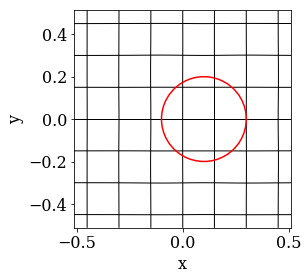

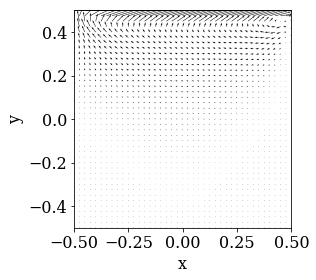

Level Set Advection Time:  0.007426023483276367
------------ Time = 0.10100000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1737373098484743e-13
Total poisson time : 0.0004239082336425781
Total INS time : 0.0060520172119140625
Max, Min, U   : 2.0, -0.1288827620609869
Max, Min, V   : 0.30167430123049993, -0.30167430123049993
Max, Min, P   : 1.0978278225154163, -0.9676355535733304
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005568981170654297
------------ Time = 0.10200000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.722970633875943e-14
Total poisson time : 0.00040602684020996094
Total INS time : 0.0076427459716796875
Max, Min, U   : 2.0, -0.12903974483666134
Max, Min, V   : 0.30194793133397657, -0.30194793133397657
Max, Min, P   : 1.09897295437804, -0.964483903041006
Max, Min, DIV : 4.350686477749832e-15, -3.434752482434078

Level Set Advection Time:  0.006247043609619141
------------ Time = 0.12600000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1651663741637773e-13
Total poisson time : 0.0007150173187255859
Total INS time : 0.015645980834960938
Max, Min, U   : 2.0, -0.1355253510777352
Max, Min, V   : 0.3069419974437192, -0.32031072814246403
Max, Min, P   : 1.0841659573358575, -0.9417392910889733
Max, Min, DIV : 3.885780586188048e-15, -3.9343528435153985e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005749940872192383
------------ Time = 0.12700000000000009 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.327677230207161e-13
Total poisson time : 0.0005030632019042969
Total INS time : 0.009449005126953125
Max, Min, U   : 2.0, -0.13586636038431799
Max, Min, V   : 0.3070993064606588, -0.32102572674134555
Max, Min, P   : 1.098112296985229, -0.9265784934691547
Max, Min, DIV : 2.9698465908722937e-15, -3.635980405647388e

Level Set Advection Time:  0.0077970027923583984
------------ Time = 0.1490000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.197371189751507e-15
Total poisson time : 0.001300811767578125
Total INS time : 0.014513969421386719
Max, Min, U   : 2.0, -0.14141140206938774
Max, Min, V   : 0.30989452573669973, -0.3345939155193395
Max, Min, P   : 1.0850639861652553, -0.9177077551238603
Max, Min, DIV : 3.845881946240581e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006948947906494141
------------ Time = 0.1500000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1906310051125585e-14
Total poisson time : 0.0004229545593261719
Total INS time : 0.011765003204345703
Max, Min, U   : 2.0, -0.14158169461335146
Max, Min, V   : 0.30999690957369835, -0.3351254358386697
Max, Min, P   : 1.0859316550270874, -0.9160259887956793
Max, Min, DIV : 3.2612801348363973e-15, -3.9968028886505635e

Level Set Advection Time:  0.006712198257446289
------------ Time = 0.17200000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3533417665148513e-13
Total poisson time : 0.00045800209045410156
Total INS time : 0.014394760131835938
Max, Min, U   : 2.0, -0.14381633097725302
Max, Min, V   : 0.3118705166966249, -0.34645657329831586
Max, Min, P   : 1.0709429788192388, -0.9160318950828935
Max, Min, DIV : 3.9968028886505635e-15, -3.3328374782204406e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00812387466430664
------------ Time = 0.17300000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.594507905163395e-13
Total poisson time : 0.00048089027404785156
Total INS time : 0.009070158004760742
Max, Min, U   : 2.0, -0.14385572499652188
Max, Min, V   : 0.31194127403077226, -0.34711867422662657
Max, Min, P   : 1.0585652425377057, -0.9278429136043618
Max, Min, DIV : 3.9968028886505635e-15, -3.24740234702

Level Set Advection Time:  0.012114763259887695
------------ Time = 0.19200000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.815265405459122e-13
Total poisson time : 0.0012378692626953125
Total INS time : 0.010204076766967773
Max, Min, U   : 2.0, -0.14703785080038517
Max, Min, V   : 0.3154315759648415, -0.35869096246008736
Max, Min, P   : 1.039737391315389, -0.9373644349488752
Max, Min, DIV : 3.7921055184853e-15, -3.7860339863193815e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00758671760559082
------------ Time = 0.19300000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.682589982296542e-14
Total poisson time : 0.001917123794555664
Total INS time : 0.011597156524658203
Max, Min, U   : 2.0, -0.14725802441095676
Max, Min, V   : 0.31562298649861364, -0.35925116339764634
Max, Min, P   : 1.0416616562862795, -0.9350186276358912
Max, Min, DIV : 3.6637359812630166e-15, -3.7192471324942744e-1

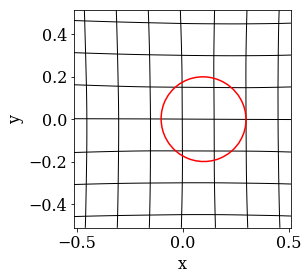

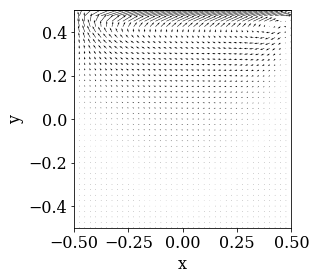

Level Set Advection Time:  0.007061004638671875
------------ Time = 0.20100000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.259138100342745e-13
Total poisson time : 0.0006949901580810547
Total INS time : 0.006156206130981445
Max, Min, U   : 2.0, -0.1488726688484842
Max, Min, V   : 0.3170864663157212, -0.3635748527361017
Max, Min, P   : 1.0232676919904176, -0.9502510915925104
Max, Min, DIV : 3.1086244689504383e-15, -3.6914915568786455e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0074350833892822266
------------ Time = 0.20200000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6277677478524336e-13
Total poisson time : 0.0004410743713378906
Total INS time : 0.01099085807800293
Max, Min, U   : 2.0, -0.1490565599103406
Max, Min, V   : 0.3172613281829205, -0.3640962970975627
Max, Min, P   : 1.0189586911027968, -0.9541897992782089
Max, Min, DIV : 4.064457104213659e-15, -4.440892098500626e-1

Max, Min, P   : 0.9348790432504913, -1.0313239490530322
Max, Min, DIV : 4.218847493575595e-15, -2.7755575615628914e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006453037261962891
------------ Time = 0.22500000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6607959440244455e-13
Total poisson time : 0.0008599758148193359
Total INS time : 0.01067495346069336
Max, Min, U   : 2.0, -0.1522655676177674
Max, Min, V   : 0.3208559912019903, -0.37504988181371207
Max, Min, P   : 0.9424459345995954, -1.0234898762486844
Max, Min, DIV : 4.066191827689636e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0057659149169921875
------------ Time = 0.22600000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.113668253960011e-13
Total poisson time : 0.0004429817199707031
Total INS time : 0.009987115859985352
Max, Min, U   : 2.0, -0.15236342287495053
Max, Min, V   : 0.32099569

Level Set Advection Time:  0.012382984161376953
------------ Time = 0.2460000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.55059837847013e-13
Total poisson time : 0.0004298686981201172
Total INS time : 0.011691093444824219
Max, Min, U   : 2.0, -0.15367275716391718
Max, Min, V   : 0.32355005391647984, -0.383560630981379
Max, Min, P   : 0.8719807416110473, -1.0891373121158452
Max, Min, DIV : 3.86843335142828e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00745701789855957
------------ Time = 0.2470000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1280460663399434e-13
Total poisson time : 0.0004432201385498047
Total INS time : 0.017156124114990234
Max, Min, U   : 2.0, -0.1537078000955658
Max, Min, V   : 0.3236668237848845, -0.3839355272177635
Max, Min, P   : 0.8638112671149035, -1.0971113855948682
Max, Min, DIV : 2.5916768731093498e-15, -3.4573038876217765e-15
Qi

Level Set Advection Time:  0.010086774826049805
------------ Time = 0.2700000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.949962633979834e-14
Total poisson time : 0.0004711151123046875
Total INS time : 0.006955862045288086
Max, Min, U   : 2.0, -0.15643873971478642
Max, Min, V   : 0.32611057963341267, -0.3918987991241645
Max, Min, P   : 0.8139013090895825, -1.1432306985236307
Max, Min, DIV : 4.191091917959966e-15, -3.851086116668512e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.008931159973144531
------------ Time = 0.2710000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.080967374939693e-13
Total poisson time : 0.0004837512969970703
Total INS time : 0.010857343673706055
Max, Min, U   : 2.0, -0.15661931920874236
Max, Min, V   : 0.326207259297457, -0.39221851215830805
Max, Min, P   : 0.8335547358744677, -1.1234400381688616
Max, Min, DIV : 3.2751579226442118e-15, -4.274358644806853e-15

Level Set Advection Time:  0.009095191955566406
------------ Time = 0.2950000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0488389091176265e-13
Total poisson time : 0.0004451274871826172
Total INS time : 0.011904001235961914
Max, Min, U   : 2.0, -0.16029738864527437
Max, Min, V   : 0.32832645614919653, -0.3993180540502236
Max, Min, P   : 0.7256829283374472, -1.2285797376912673
Max, Min, DIV : 4.191091917959966e-15, -3.573530360512223e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006354808807373047
------------ Time = 0.2960000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2740119277967014e-13
Total poisson time : 0.00043392181396484375
Total INS time : 0.011586189270019531
Max, Min, U   : 2.0, -0.16042452751659822
Max, Min, V   : 0.3284071001655764, -0.39959171803059484
Max, Min, P   : 0.73189774325189, -1.222276322152129
Max, Min, DIV : 4.066191827689636e-15, -3.552713678800501e-15

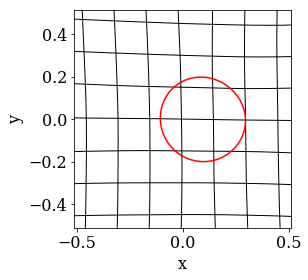

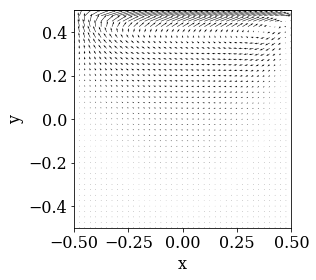

Level Set Advection Time:  0.006473064422607422
------------ Time = 0.3010000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.598256874479659e-13
Total poisson time : 0.0004258155822753906
Total INS time : 0.006055116653442383
Max, Min, U   : 2.0, -0.16103057083337988
Max, Min, V   : 0.328802030098705, -0.4009356684150881
Max, Min, P   : 0.6718796017714372, -1.2818563436867214
Max, Min, DIV : 3.2491370705045597e-15, -3.1433189384699745e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0074498653411865234
------------ Time = 0.3020000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.50576260482401e-13
Total poisson time : 0.00046896934509277344
Total INS time : 0.011503219604492188
Max, Min, U   : 2.0, -0.16114592831302021
Max, Min, V   : 0.328879395787346, -0.4011996791229678
Max, Min, P   : 0.6652876991025042, -1.2883650854003221
Max, Min, DIV : 4.052314039881821e-15, -4.274358644806853e-15


Level Set Advection Time:  0.0068972110748291016
------------ Time = 0.32300000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1595936436801e-13
Total poisson time : 0.00045680999755859375
Total INS time : 0.015729904174804688
Max, Min, U   : 2.0, -0.1631409413039482
Max, Min, V   : 0.33038976232374107, -0.40640231011861333
Max, Min, P   : 0.6966577833902753, -1.2555557309283616
Max, Min, DIV : 3.774758283725532e-15, -4.0592529337857286e-15
Qin, Qout     : 0.0, 0.0




KeyboardInterrupt: 

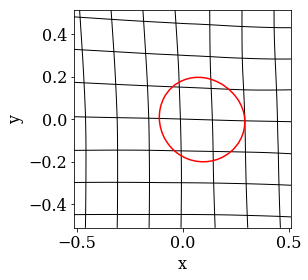

In [4]:
while scalars.time <= scalars.tmax:
    
    ins.advance()
    
    imbound.advect()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Advection Time: ",imbound._advection_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_vector(gridx,gridy,'velc')
        flowx.io.plot_contour_zero(gridc, scalars, 'ibmf', 'ibmx', 'ibmy')


    scalars.advance()

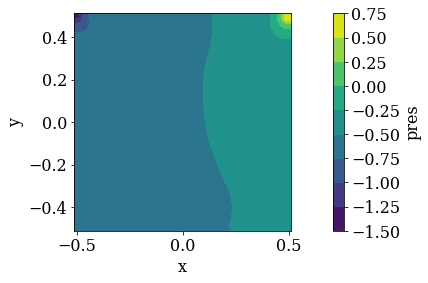

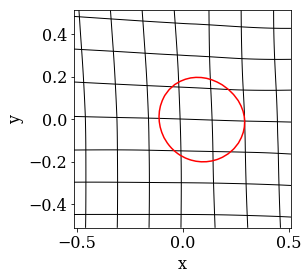

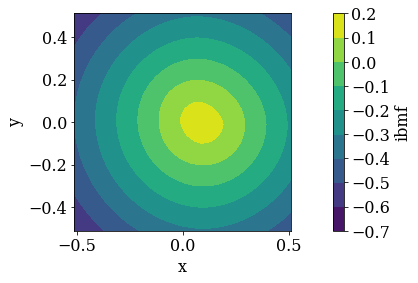

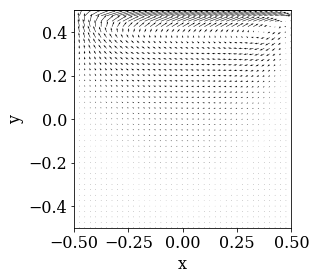

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour_zero(gridc, scalars, 'ibmf', 'ibmx', 'ibmy')
flowx.io.plot_contour(gridc, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')